In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BASE_DIR = '/kaggle/input/age-gender-data/UTKFace'

In [3]:
def age_categorize(age):
    if age <=1:
        return 0
    elif age <=3:
        return 1
    elif age <=12:
        return 2
    elif age <=18:
        return 3
    elif age <=25:
        return 4
    elif age <=35:
        return 5
    elif age <=45:
        return 6
    elif age <=59:
        return 7
    else:
        return 8


In [4]:
# The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

# [age] is an integer from 0 to 116, indicating the age
# [gender] is either 0 (male) or 1 (female)
# [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
# [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

gender_label = ['Male', 'Female']
ethnic_label = ['White', 'Black', 'Asian', 'Indian', 'Others']
age_interval = ['[0-1]', '[2-6]', '[7-12]', '[13-18]', '[19-25]', '[26-35]', '[36-45]', '[46-59]', '[60-Older]']
age_cat =   ['Baby', 'Infancy', 'Pre-school Age', 'Teenager', 'Young Adult', 'Early Middle Age', 'Middle Age', 'Elderly']

#labels - age, gender, ethnicity
image_paths = []
age_labels = []
age_cat_labels = []
gender_labels = []
ethnic_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    try:
        age = int(temp[0])
        age_cat = age_categorize(int(temp[0]))
        gender = int(temp[1])
        ethnic = int(temp[2])
    except:
        print(image_path)
    image_paths.append(image_path)
    age_cat_labels.append(age_cat)
    age_labels.append(age)
    gender_labels.append(gender)
    ethnic_labels.append(ethnic)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame()
df['image'] = image_paths
df['gender'] = gender_labels
df['age'] = age_labels
df['ethnic'] = ethnic_labels
df['age_cat'] = age_cat_labels
df

,image,gender,age,ethnic,age_cat
0,/kaggle/input/age-gender-data/UTKFace/26_0_2_2...,0,26,2,5
1,/kaggle/input/age-gender-data/UTKFace/22_1_1_2...,1,22,1,4
2,/kaggle/input/age-gender-data/UTKFace/21_1_3_2...,1,21,3,4
3,/kaggle/input/age-gender-data/UTKFace/28_0_0_2...,0,28,0,5
4,/kaggle/input/age-gender-data/UTKFace/17_1_4_2...,1,17,4,3
...,...,...,...,...,...
23703,/kaggle/input/age-gender-data/UTKFace/41_0_0_2...,0,41,0,6
23704,/kaggle/input/age-gender-data/UTKFace/42_0_0_2...,0,42,0,6
23705,/kaggle/input/age-gender-data/UTKFace/2_0_2_20...,0,2,2,1
23706,/kaggle/input/age-gender-data/UTKFace/65_1_0_2...,1,65,0,8


In [6]:
x = tf.keras.utils.to_categorical(df['ethnic'].values)
df['ethnic_cat'] = x.tolist()

# x = tf.keras.utils.to_categorical(df['age_cat'].values)
# df['age_cat'] = x.astype(int).tolist()

x = tf.keras.utils.to_categorical(df['gender'].values)
df['gender_cat'] = x.tolist()
df

,image,gender,age,ethnic,age_cat,ethnic_cat,gender_cat
0,/kaggle/input/age-gender-data/UTKFace/26_0_2_2...,0,26,2,5,"[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
1,/kaggle/input/age-gender-data/UTKFace/22_1_1_2...,1,22,1,4,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
2,/kaggle/input/age-gender-data/UTKFace/21_1_3_2...,1,21,3,4,"[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 1.0]"
3,/kaggle/input/age-gender-data/UTKFace/28_0_0_2...,0,28,0,5,"[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0]"
4,/kaggle/input/age-gender-data/UTKFace/17_1_4_2...,1,17,4,3,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]"
...,...,...,...,...,...,...,...
23703,/kaggle/input/age-gender-data/UTKFace/41_0_0_2...,0,41,0,6,"[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0]"
23704,/kaggle/input/age-gender-data/UTKFace/42_0_0_2...,0,42,0,6,"[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0]"
23705,/kaggle/input/age-gender-data/UTKFace/2_0_2_20...,0,2,2,1,"[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
23706,/kaggle/input/age-gender-data/UTKFace/65_1_0_2...,1,65,0,8,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_resize = (200, 200)

validation_split = 0.2
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range=0.5,
    zoom_range=0.1,
    brightness_range = (0.5,1.5),
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)


train_iterator= train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
#     y_col=['age_cat', 'gender_cat', 'ethnic_cat'],
    y_col=['age', 'gender_cat'],
#     y_col='age',
    target_size=img_resize,
    batch_size = 32,
# 	class_mode='raw',
    class_mode='multi_output',
    subset = 'training'
)

validation_iterator= train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
#     y_col=['age_cat', 'gender_cat', 'ethnic_cat'],
    y_col=['age', 'gender_cat'],
#     y_col='age',
    target_size=img_resize,
    batch_size = 32,
# 	class_mode='raw',
    class_mode='multi_output',
    subset = 'validation'
)


Found 18967 validated image filenames.
Found 4741 validated image filenames.


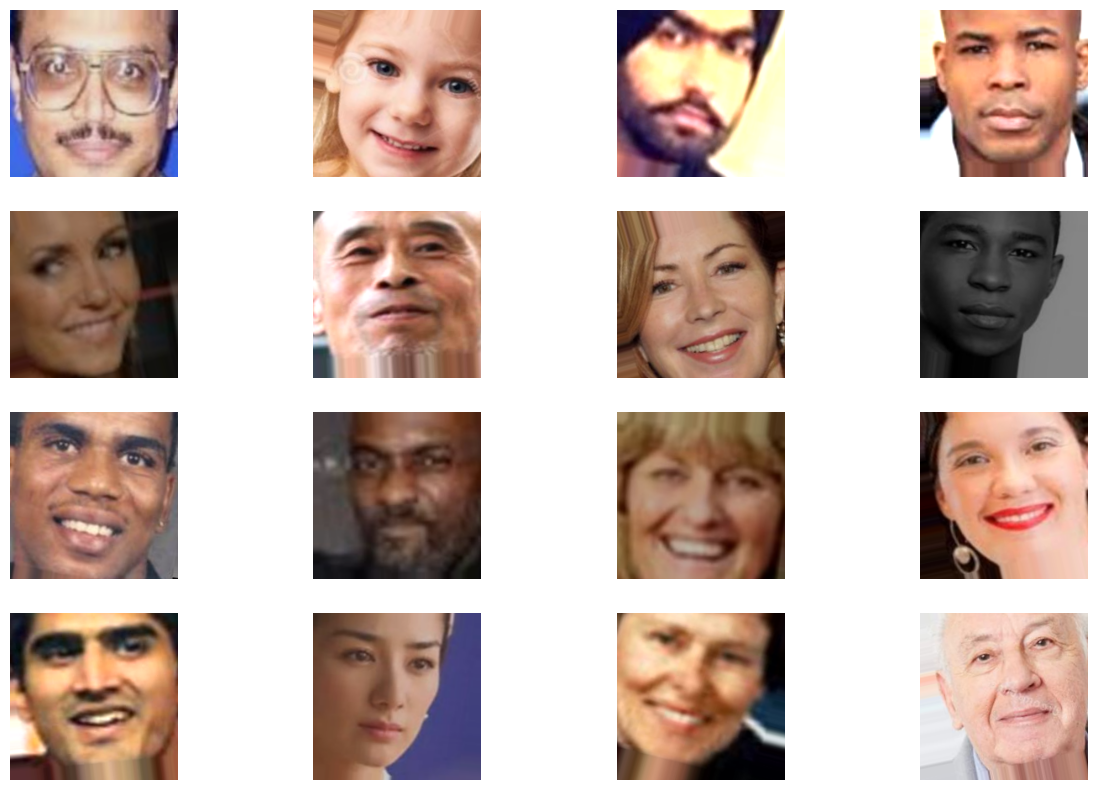

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10)) 
rows = 4
columns = 4
for image in train_iterator:
    for i in range(16):
        fig.add_subplot(rows, columns, i+1)  
        plt.imshow(image[0][i]) 
        plt.axis('off') 
    break

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, Add, MaxPool2D, Flatten, Dense, AveragePooling2D
from keras.activations import relu
from tensorflow.keras.models import Model

input_shape = img_resize + (3,)

def residual_block_34(x, filters, time):
    
    for _ in range(time):
        residual = x
        x = Conv2D(filters = filters, kernel_size=(3, 3), strides = (1, 1), padding="same")(x)
        x = BatchNormalization()(x)
        x = relu(x)

        x = Conv2D(filters = filters, kernel_size=(3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Add()([residual, x])
        x = relu(x)
        

    return x

def residual_block_50(x, filters, time):
    residual = Conv2D(filters = filters*4, kernel_size=3, strides = 1, padding="same")(x)
    residual = BatchNormalization()(residual)
    for _ in range(time):

        x = Conv2D(filters = filters, kernel_size=1, strides = 1, padding="same")(x)
        x = BatchNormalization()(x)
        x = relu(x)

        x = Conv2D(filters = filters, kernel_size=3, strides = 1, padding="same")(x)
        x = BatchNormalization()(x)
        x = relu(x)

        x = Conv2D(filters = filters*4, kernel_size=(3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Add()([residual, x])
        x = relu(x)
        
        residual = x

    return x

# filters = [64,128,256,512], times=[2,2,2,2] for resnet18 and [3,4,6,3] for resnet34
def make_layer_34(x, filters, times):
    for i in range(len(filters)-1):
        x = residual_block_34(x, filters[i], times[i])
        x = Conv2D(filters=filters[i+1], kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu")(x)

    x = residual_block_34(x, filters[-1], times[-1])

    return x

def make_layer_50(x, filters, times):
    for i in range(len(filters)-1):
        x = residual_block_50(x, filters[i], times[i])
        x = Conv2D(filters=filters[i+1], kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu")(x)

    x = residual_block_50(x, filters[-1], times[-1])

    return x



input_layer = Input(input_shape)
x = Conv2D(filters=64, kernel_size=7, strides=2, padding="same", activation='relu')(input_layer)
x = BatchNormalization()(x)
x = relu(x)
x = MaxPool2D(2, 2)(x)

# ResNet18
# x = make_layer_34(x, [64,128,256,512], [2,2,2,2])
# x = AveragePooling2D()(x) 

# ResNet34
# x = make_layer_34(x, [64,128,256,512], [3,4,6,3])
# x = AveragePooling2D()(x) 

# ResNet50
x = make_layer_50(x, [64,128,256,512], [3,4,6,3])
# x = AveragePooling2D()(x) 

resnet = Model(inputs=input_layer, outputs = x)
# resnet.summary()

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet import ResNet50, ResNet101

resnet = ResNet101(input_shape=input_shape, weights='imagenet', include_top=False)
x = Dropout(0.2)(resnet.output)
x = GlobalMaxPooling2D()(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(64, activation='relu')(x)
gender_prediction = Dense(64, activation='relu')(x)
# race_prediction = Dense(64, activation='relu')(x)

# age_prediction = Dense(9, activation='softmax', name='age_prediction')(age_prediction)
age_prediction = Dense(1, activation='relu', name='age_prediction')(age_prediction)
gender_prediction = Dense(2, activation='softmax', name='gender_prediction')(gender_prediction)
# race_prediction = Dense(5, activation='softmax', name='race_prediction')(race_prediction)

# model = Model(inputs=resnet.input, outputs=[age_prediction, gender_prediction, race_prediction])
model = Model(inputs=resnet.input, outputs=[age_prediction, gender_prediction])
# model.summary()

171446536/171446536 [==============================] - 1s 0us/step


In [11]:
# tf.keras.utils.plot_model(model)

In [12]:
import wandb
wandb.login(key='5c3e9b95e6a306b468647bd1af41bb4d188eff51')
wandb.init(
    project='DL Project',
    config={"bs": 12}
)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hoangdat18112003 (dathoang). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20231220_095852-os9yrsw3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run volcanic-snowflake-17
wandb: ⭐️ View project at https://wandb.ai/dathoang/DL%20Project
wandb: 🚀 View run at https://wandb.ai/dathoang/DL%20Project/runs/os9yrsw3


In [13]:
from keras.models import load_model
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003), loss=['categorical_crossentropy', 'binary_crossentropy', 'categorical_crossentropy'],metrics={'age_prediction': 'mean_absolute_error'})
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003), loss=['mean_absolute_error', 'binary_crossentropy'],metrics={'age_prediction': 'mean_absolute_error'})

earlystop = EarlyStopping(min_delta = 0.0005, monitor='loss', patience=3)
checkpoint = ModelCheckpoint("/kaggle/working/best_Resnet.h5", save_best_only=True)

In [14]:
# class GenderLoss(tf.keras.losses.Loss):
#     def __init__(self):
#         super().__init__()
#     def call(self, y_true, y_pred):
#         binary_cross = tf.keras.losses.BinaryCrossentropy(from_logits=True)
#         return binary_cross(y_true, y_pred)*5

In [15]:
# filepath = '/kaggle/input/agemodel-checkpoint/ageModel.h5'
filepath = '/kaggle/input/checkpoint-dl/agegender_Lib50_50epoch.h5'
if filepath != "":
    model = load_model(filepath)
    history = model.fit(train_iterator, epochs=50, validation_data = validation_iterator, callbacks=[WandbMetricsLogger(), earlystop, checkpoint])
else: 
#     model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003), loss=['mean_absolute_error'],metrics={'age_prediction': 'mean_absolute_error'})
#     model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.003), loss=['mean_absolute_error', 'binary_crossentropy'],metrics={'age_prediction': 'mean_absolute_error'})
#     model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003), loss=['mean_absolute_error', GenderLoss()],metrics={'age_prediction': 'mean_absolute_error'})
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003), loss=['mean_absolute_error', 'binary_crossentropy'],metrics={'age_prediction': 'mean_absolute_error'})

    history = model.fit(train_iterator, epochs=100, validation_data = validation_iterator, callbacks=[WandbMetricsLogger(), earlystop, checkpoint])

Epoch 1/50


2023-12-20 09:59:33.970383: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


593/593 [==============================] - 411s 662ms/step - loss: 3.7542 - age_prediction_loss: 3.5999 - gender_prediction_loss: 0.1543 - age_prediction_mean_absolute_error: 3.5999 - val_loss: 7.6488 - val_age_prediction_loss: 7.4464 - val_gender_prediction_loss: 0.2024 - val_age_prediction_mean_absolute_error: 7.4464
Epoch 2/50
593/593 [==============================] - 308s 519ms/step - loss: 3.7500 - age_prediction_loss: 3.5980 - gender_prediction_loss: 0.1519 - age_prediction_mean_absolute_error: 3.5980 - val_loss: 7.5598 - val_age_prediction_loss: 7.3616 - val_gender_prediction_loss: 0.1983 - val_age_prediction_mean_absolute_error: 7.3616
Epoch 3/50
593/593 [==============================] - 306s 515ms/step - loss: 3.6750 - age_prediction_loss: 3.5259 - gender_prediction_loss: 0.1491 - age_prediction_mean_absolute_error: 3.5259 - val_loss: 7.0038 - val_age_prediction_loss: 6.8278 - val_gender_prediction_loss: 0.1760 - val_age_prediction_mean_absolute_error: 6.8278
Epoch 4/50
593/

In [16]:
model.save("/kaggle/working/Resnet.h5")

In [17]:
from keras.models import load_model

filepath = ''
if filepath != "":
    model = load_model(filepath)

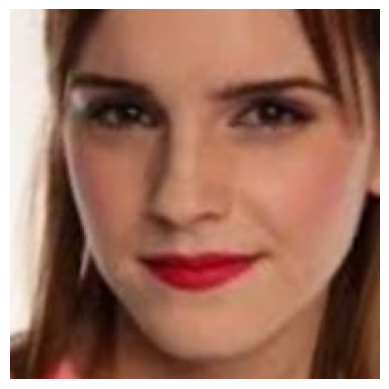

1/1 [==============================] - 2s 2s/step
Predicted Gender: [array([[19.11721]], dtype=float32), array([[0.00152569, 0.9984743 ]], dtype=float32)]


In [18]:
import math
import numpy as np
# import tf.keras.utils as image

# uploaded = files.upload()
# print(uploaded)
# for filename in uploaded.keys():

  # predicting images
path = '/kaggle/input/age-gender-data/UTKFace/23_1_0_20170117144945297.jpg.chip.jpg'
img = tf.keras.utils.load_img(path, target_size=img_resize)
plt.imshow(img)
plt.axis('Off')
plt.show()
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])/255.
pred = model.predict(images)
# pred_gender = gender_label[np.argmax(pred[1][0])]
# pred_ethnic = ethnic_label[np.argmax(pred[2][0])]
# pred_age = age_interval[np.argmax(pred[0][0])]

# print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}, Predicted Ethnic: {pred_ethnic}")
print(f"Predicted Gender: {pred}")

1/1 [==============================] - 0s 27ms/step


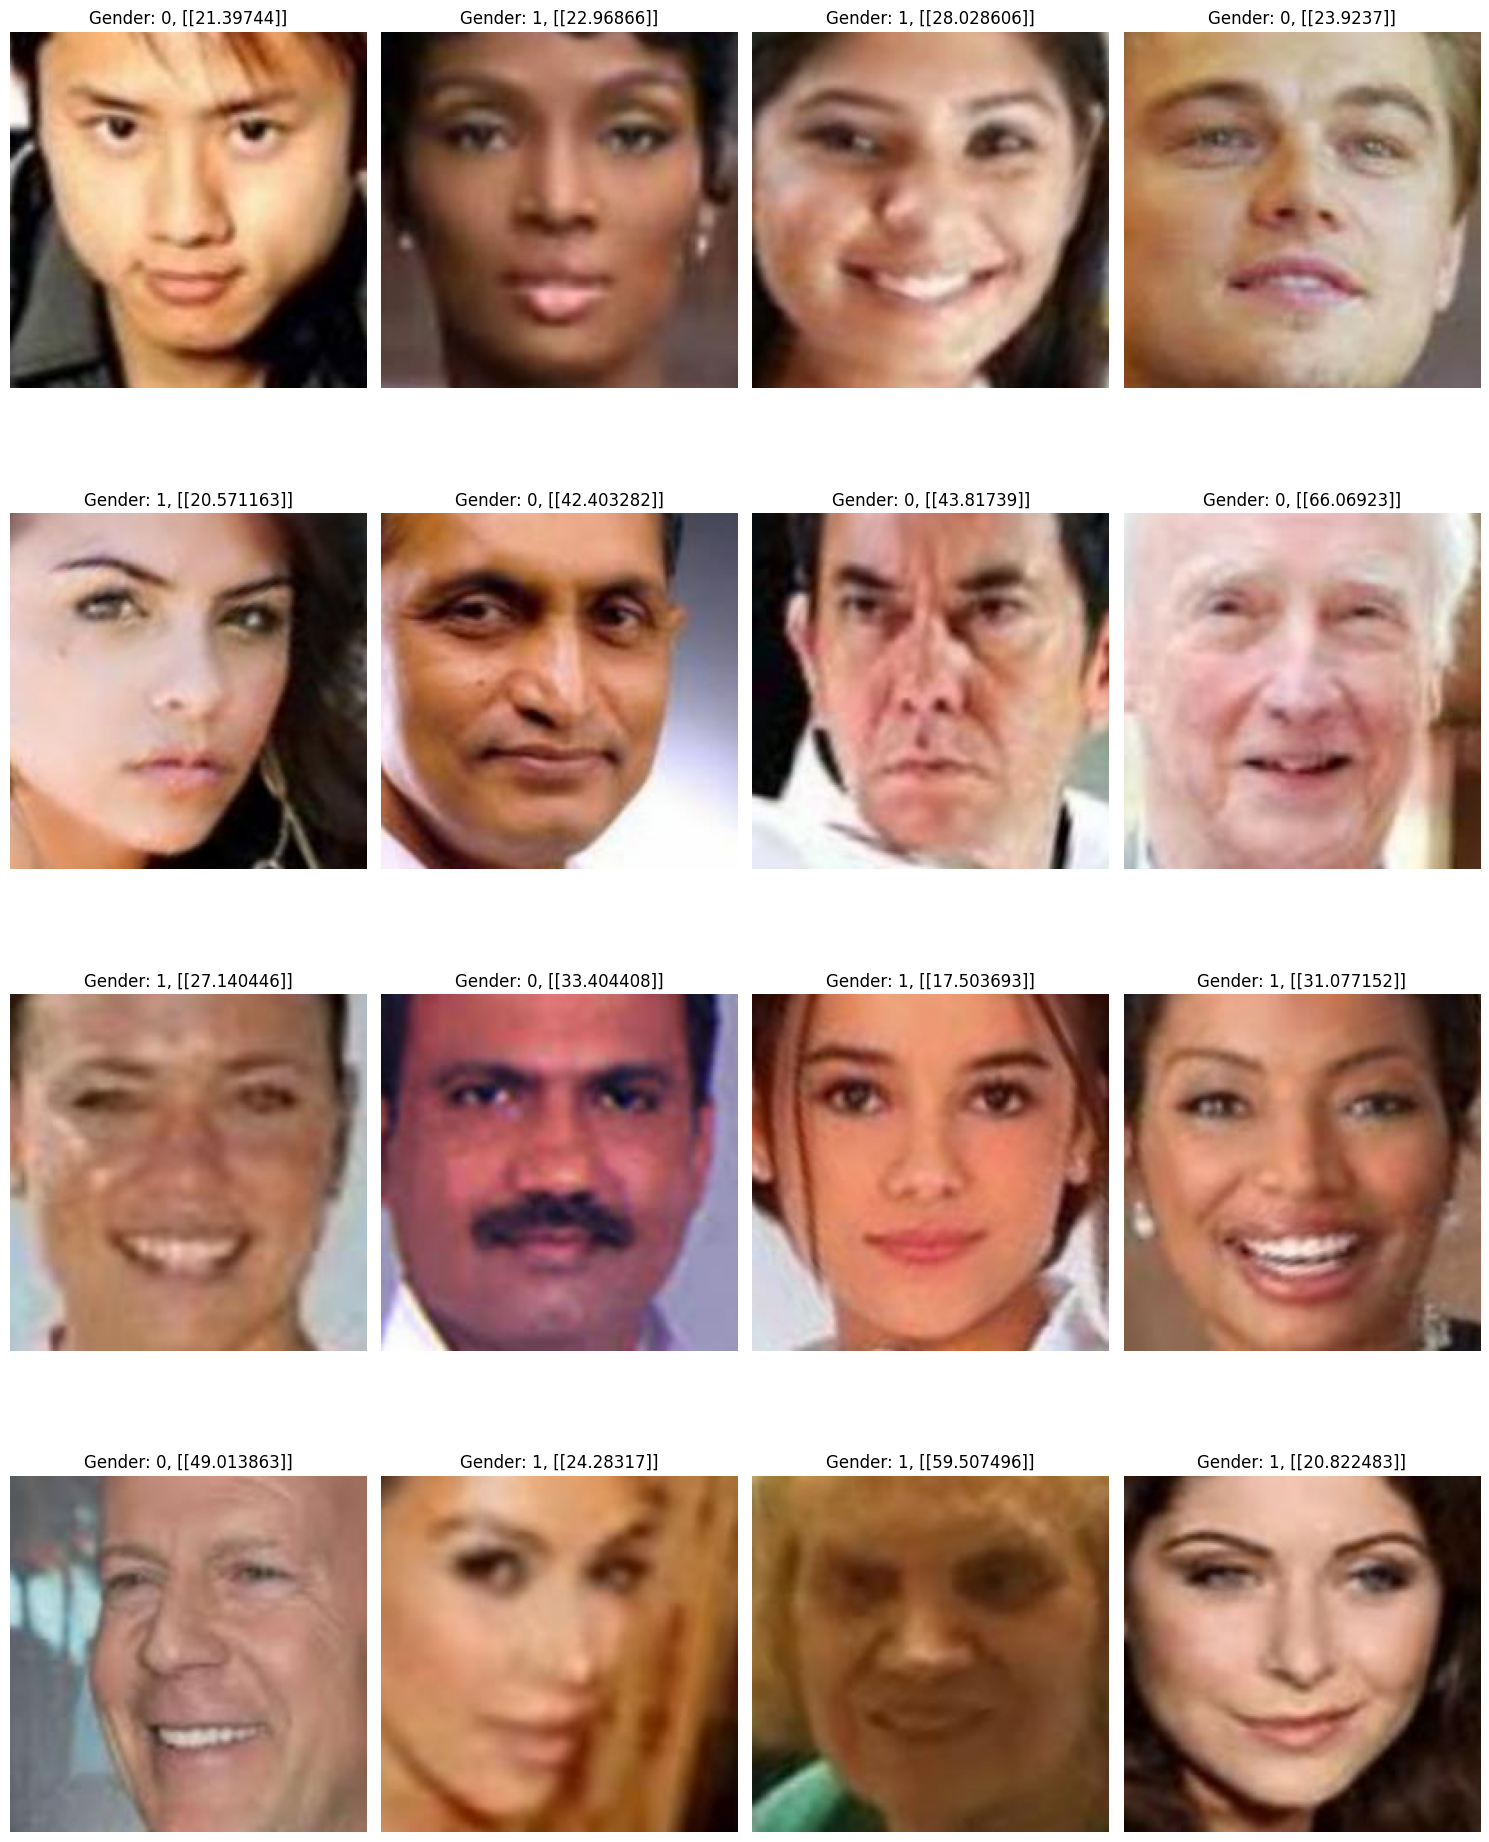

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf

# Specify the folder path
folder_path = '/kaggle/input/age-gender-data/UTKFace'

img_resize = (200, 200)

# List all files in the folder
file_names = os.listdir(folder_path)[:16]

# Set up subplots based on the number of images
rows = len(file_names) // 4 + (len(file_names) % 4 > 0)  # Calculate the number of rows needed
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Iterate over file names and plot images
for i, file_name in enumerate(file_names):
    # Calculate the current row and column
    row = i // cols
    col = i % cols

    # Construct the full path
    file_path = os.path.join(folder_path, file_name)

    # Open image using PIL
    img = tf.keras.utils.load_img(file_path, target_size=img_resize)
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])/255.
    pred = model.predict(images)

    # Plot the image
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    
    text = file_name.split('_')
    axes[row, col].set_title(f'Gender: {text[1]}, {pred[0]}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()
